<h1 style='text-align: center'>
    Deep Learning Basics
</h1>

<h2 style='text-align: center'>
    - Live demo -
</h2>

<h3 style='text-align: center'>
    Datta Lab presentation @ Princeton University
</h3>

<h4 style='text-align: center'>
    2023-07-07
</h4>

<h4 style='text-align: center'>
    <i>by <a href="http://lellep.xyz/">Martin Lellep</a></i>
</h4>

## Fitting function

### Fitting a linear function

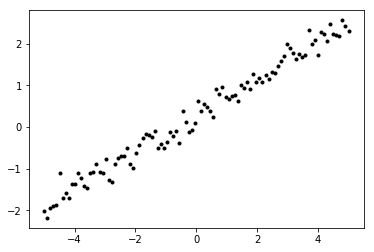

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.43
b = 0.25

noise = 2e-1

x_data = np.linspace(-5, 5, 100)
y_data = m * x_data + b + noise * np.random.normal(size=x_data.shape[0])

plt.figure()
plt.plot(x_data, y_data, '.', c='black')
plt.show()

In [3]:
coefficients = np.polyfit(x_data, y_data, 1)
print('slope and bias:', coefficients)

slope and bias: [0.44111106 0.28491312]


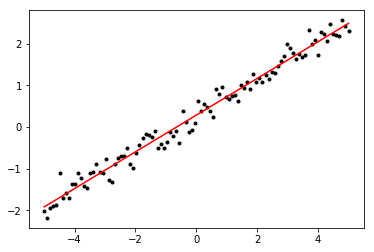

In [4]:
plt.figure()
plt.plot(x_data, y_data, '.', c='black')
plt.plot(x_data, np.poly1d(coefficients)(x_data), '-', c='red')
plt.show()

### Fitting a non-linear function

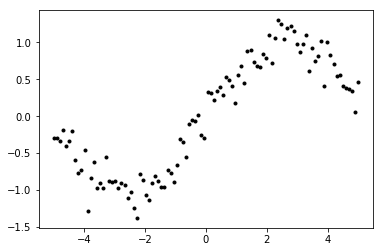

In [5]:
import numpy as np
import matplotlib.pyplot as plt

omega = 0.61

noise = 2e-1

x_data = np.linspace(-5, 5, 100)
y_data = np.sin(x_data * omega) + noise * np.random.normal(size=x_data.shape[0])

plt.figure()
plt.plot(x_data, y_data, '.', c='black')
plt.show()

omega: [0.59137308]


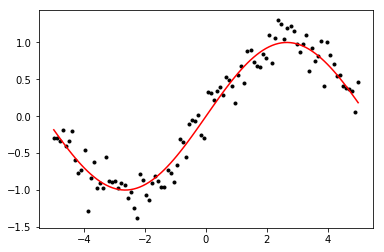

In [8]:
from scipy.optimize import curve_fit

def fit_function(x, o):
    return np.sin(x * o)

popt, pcov = curve_fit(fit_function, x_data, y_data)

print('omega:', popt)

plt.figure()
plt.plot(x_data, y_data, '.', c='black')
plt.plot(x_data, fit_function(x_data, *popt), 'r-',
         label='fit: o=%5.3f' % tuple(popt))
plt.show()

## Keras example: Learn 2D function

In [1]:
# Function
def f(x, y):
    return 2*x**2 + 4*y**2

In [2]:
import numpy as np

# Training data
resolution = 100
X, Y = np.meshgrid(np.linspace(-1, 1, resolution), np.linspace(-1, 1, resolution))
Z = f(X, Y)

<IPython.core.display.Javascript object>


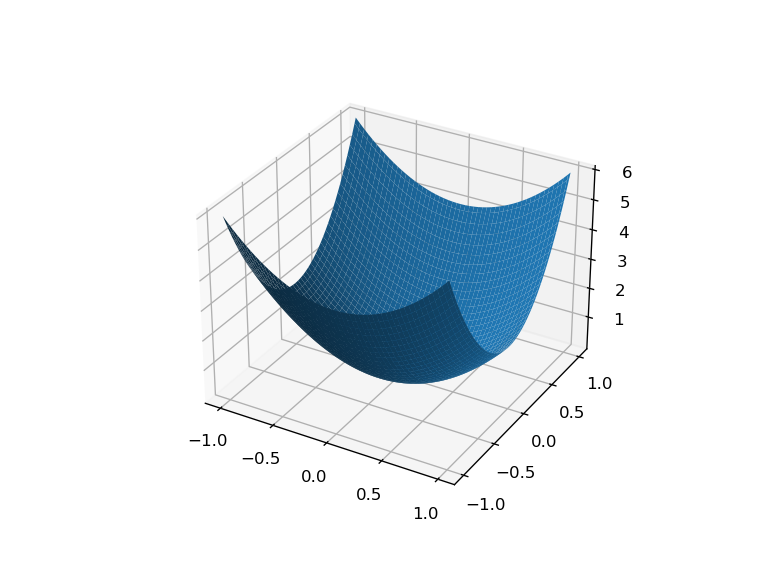

In [3]:
# Visualise function
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Select training data
val_percentage = 0.2
X_all = np.vstack([X.ravel(), Y.ravel()]).T # Typical ML parlence
Y_all = Z.ravel() # Typical ML parlence
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=val_percentage, random_state=42)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

# Construct NN

model = Sequential()
model.add(Dense(4, input_dim=2, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam')


Epoch 1/1500
8000/8000 [==============================] - 1s 78us/step - loss: 9.9029
Epoch 2/1500
8000/8000 [==============================] - 0s 11us/step - loss: 8.7419
Epoch 3/1500
8000/8000 [==============================] - 0s 11us/step - loss: 7.7840
Epoch 4/1500
8000/8000 [==============================] - 0s 13us/step - loss: 7.0042
Epoch 5/1500
8000/8000 [==============================] - 0s 11us/step - loss: 6.3753
Epoch 6/1500
8000/8000 [==============================] - 0s 11us/step - loss: 5.8672
Epoch 7/1500
8000/8000 [==============================] - 0s 11us/step - loss: 5.4511
Epoch 8/1500
8000/8000 [==============================] - 0s 12us/step - loss: 5.1029
Epoch 9/1500
8000/8000 [==============================] - 0s 12us/step - loss: 4.8055
Epoch 10/1500
8000/8000 [==============================] - 0s 11us/step - loss: 4.5457
Epoch 11/1500
8000/8000 [==============================] - 0s 12us/step - loss: 4.3137
Epoch 12/1500
8000/8000 [===========================

8000/8000 [==============================] - 0s 11us/step - loss: 1.8591
Epoch 189/1500
8000/8000 [==============================] - 0s 11us/step - loss: 1.8590
Epoch 190/1500
8000/8000 [==============================] - 0s 11us/step - loss: 1.8593
Epoch 191/1500
8000/8000 [==============================] - 0s 11us/step - loss: 1.8591
Epoch 192/1500
8000/8000 [==============================] - 0s 15us/step - loss: 1.8590
Epoch 193/1500
8000/8000 [==============================] - 0s 11us/step - loss: 1.8593
Epoch 194/1500
8000/8000 [==============================] - 0s 12us/step - loss: 1.8592
Epoch 195/1500
8000/8000 [==============================] - 0s 10us/step - loss: 1.8590
Epoch 196/1500
8000/8000 [==============================] - 0s 11us/step - loss: 1.8591
Epoch 197/1500
8000/8000 [==============================] - 0s 10us/step - loss: 1.8591
Epoch 198/1500
8000/8000 [==============================] - 0s 9us/step - loss: 1.8591
Epoch 199/1500
8000/8000 [======================

8000/8000 [==============================] - 0s 12us/step - loss: 0.3822
Epoch 375/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.3816
Epoch 376/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.3815
Epoch 377/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.3816
Epoch 378/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.3818
Epoch 379/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.3812
Epoch 380/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.3815
Epoch 381/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.3812
Epoch 382/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.3816
Epoch 383/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.3809
Epoch 384/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.3807
Epoch 385/1500
8000/8000 [======================

8000/8000 [==============================] - 0s 11us/step - loss: 0.0076
Epoch 561/1500
8000/8000 [==============================] - 0s 15us/step - loss: 0.0075
Epoch 562/1500
8000/8000 [==============================] - 0s 15us/step - loss: 0.0073
Epoch 563/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0073
Epoch 564/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0071
Epoch 565/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0070
Epoch 566/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0070
Epoch 567/1500
8000/8000 [==============================] - 0s 13us/step - loss: 0.0069
Epoch 568/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0068
Epoch 569/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0067
Epoch 570/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0066
Epoch 571/1500
8000/8000 [======================

8000/8000 [==============================] - 0s 13us/step - loss: 0.0022
Epoch 747/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 748/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0022
Epoch 749/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 750/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 751/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0022
Epoch 752/1500
8000/8000 [==============================] - 0s 12us/step - loss: 0.0022
Epoch 753/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0022
Epoch 754/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0021
Epoch 755/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0021
Epoch 756/1500
8000/8000 [==============================] - 0s 11us/step - loss: 0.0021
Epoch 757/1500
8000/8000 [=====================

8000/8000 [==============================] - 0s 10us/step - loss: 0.0013
Epoch 933/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 934/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 935/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 936/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0013
Epoch 937/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 938/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 939/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 940/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 941/1500
8000/8000 [==============================] - 0s 9us/step - loss: 0.0013
Epoch 942/1500
8000/8000 [==============================] - 0s 10us/step - loss: 0.0013
Epoch 943/1500
8000/8000 [=============================

8000/8000 [==============================] - 0s 12us/step - loss: 9.1819e-04
Epoch 1116/1500
8000/8000 [==============================] - 0s 11us/step - loss: 9.1134e-04
Epoch 1117/1500
8000/8000 [==============================] - 0s 10us/step - loss: 9.3536e-04
Epoch 1118/1500
8000/8000 [==============================] - 0s 11us/step - loss: 9.1279e-04
Epoch 1119/1500
8000/8000 [==============================] - 0s 12us/step - loss: 9.0961e-04
Epoch 1120/1500
8000/8000 [==============================] - 0s 11us/step - loss: 8.9485e-04
Epoch 1121/1500
8000/8000 [==============================] - 0s 11us/step - loss: 9.1354e-04
Epoch 1122/1500
8000/8000 [==============================] - 0s 11us/step - loss: 9.0753e-04
Epoch 1123/1500
8000/8000 [==============================] - 0s 11us/step - loss: 8.8821e-04
Epoch 1124/1500
8000/8000 [==============================] - 0s 10us/step - loss: 9.0736e-04
Epoch 1125/1500
8000/8000 [==============================] - 0s 10us/step - loss: 9.17

8000/8000 [==============================] - 0s 12us/step - loss: 7.2094e-04
Epoch 1292/1500
8000/8000 [==============================] - 0s 10us/step - loss: 7.1265e-04
Epoch 1293/1500
8000/8000 [==============================] - 0s 9us/step - loss: 7.1323e-04
Epoch 1294/1500
8000/8000 [==============================] - 0s 12us/step - loss: 7.1902e-04
Epoch 1295/1500
8000/8000 [==============================] - 0s 15us/step - loss: 7.0100e-04
Epoch 1296/1500
8000/8000 [==============================] - 0s 9us/step - loss: 7.1021e-04
Epoch 1297/1500
8000/8000 [==============================] - 0s 11us/step - loss: 7.0870e-04
Epoch 1298/1500
8000/8000 [==============================] - 0s 11us/step - loss: 7.0839e-04
Epoch 1299/1500
8000/8000 [==============================] - 0s 9us/step - loss: 7.0592e-04
Epoch 1300/1500
8000/8000 [==============================] - 0s 10us/step - loss: 7.1672e-04
Epoch 1301/1500
8000/8000 [==============================] - 0s 11us/step - loss: 6.9873e

8000/8000 [==============================] - 0s 10us/step - loss: 6.0231e-04
Epoch 1468/1500
8000/8000 [==============================] - 0s 9us/step - loss: 5.9964e-04
Epoch 1469/1500
8000/8000 [==============================] - 0s 10us/step - loss: 6.0950e-04
Epoch 1470/1500
8000/8000 [==============================] - 0s 9us/step - loss: 5.8955e-04
Epoch 1471/1500
8000/8000 [==============================] - 0s 9us/step - loss: 5.9873e-04
Epoch 1472/1500
8000/8000 [==============================] - 0s 9us/step - loss: 6.0599e-04
Epoch 1473/1500
8000/8000 [==============================] - 0s 10us/step - loss: 5.7765e-04
Epoch 1474/1500
8000/8000 [==============================] - 0s 9us/step - loss: 5.9782e-04
Epoch 1475/1500
8000/8000 [==============================] - 0s 10us/step - loss: 5.7972e-04
Epoch 1476/1500
8000/8000 [==============================] - 0s 10us/step - loss: 5.8932e-04
Epoch 1477/1500
8000/8000 [==============================] - 0s 9us/step - loss: 5.8115e-04

<IPython.core.display.Javascript object>


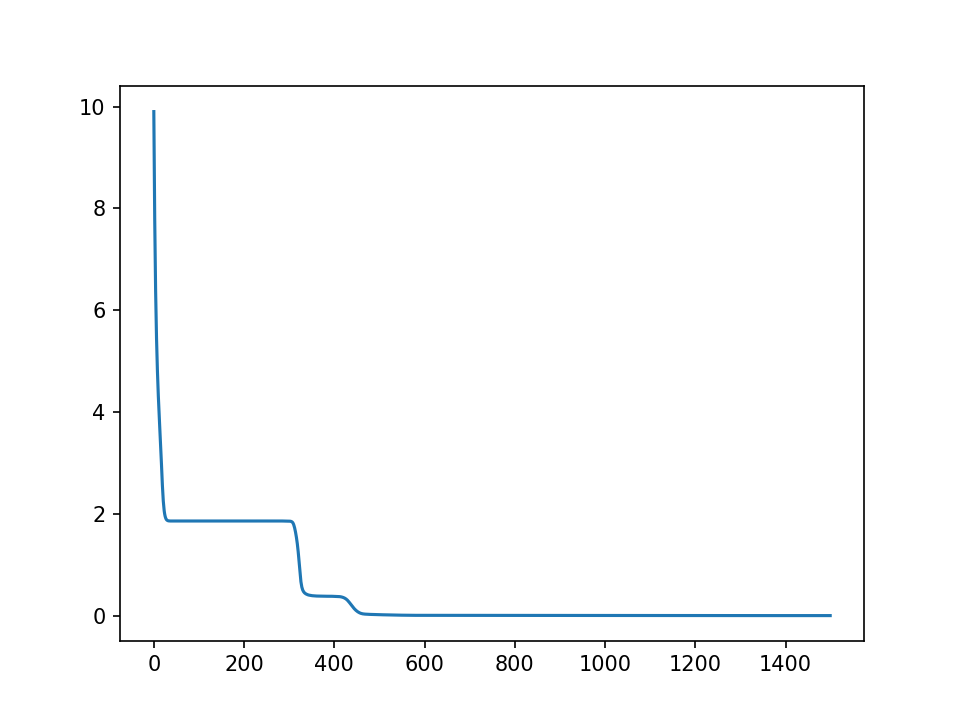

In [27]:
# Train NN
history = model.fit(X_train, y_train, epochs=1500, batch_size=128, verbose=1)

plt.figure(dpi=150)
plt.plot(history.history['loss'])
plt.show()

In [39]:
# Note: Uncomment the following to see how the model behaves when it needs to extrapolate
# X_test *= 10

# Apply NN to test data
y_test_predicted = model.predict(X_test)

<IPython.core.display.Javascript object>


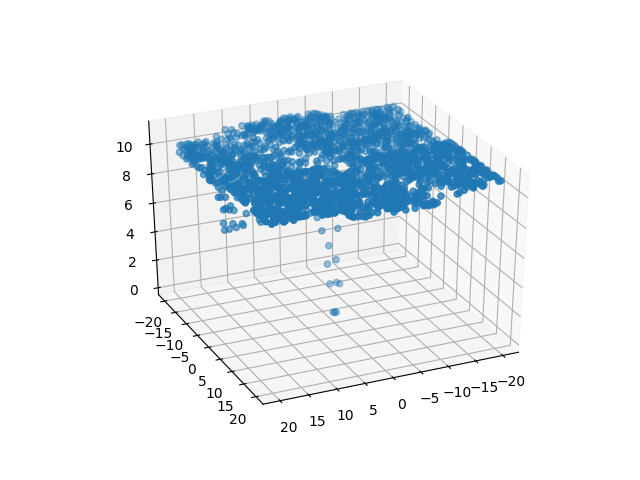

In [40]:
# Visualise predicted data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test_predicted[:, 0])
plt.show()

Note: Neither data normalisation nor any regularisation has been used here. I skipped this on purpose.

Note 2: Our analytic example consisted of 8 weights. The model we just trained uses some more weights. Use ''model.summary()'' to get an overview:

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


## Keras example: MNIST with CNN

(taken from https://keras.io/examples/mnist_cnn/)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.2622 - acc: 0.9179 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0850 - acc: 0.9749 - val_loss: 0.0377 - val_acc: 0.9879
Epoch 3/12
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0650 - acc: 0.9807 - val_loss: 0.0318 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0309 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0471 - acc: 0.9859 - val_loss: 0.0304 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 7/12
33152/60000 [===============>.........

Check the number of weights in this example:

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________